In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

sci_data = pd.read_csv('data/sci.csv',encoding='latin-1',keep_default_na=False,na_values=['..','#N/A'])
print(sci_data)

      user_loc fr_loc  scaled_sci  Migrants_from_fr
0           AE     AE     1318515               NaN
1           AE     AG        7764               NaN
2           AE     AL        2836               NaN
3           AE     AM        4174               NaN
4           AE     AO        2954               NaN
...        ...    ...         ...               ...
34220       NA     YT       12385               NaN
34221       NA     ZA       88866            7872.0
34222       NA     ZM      137582            2806.0
34223       NA     ZW      326749           13413.0
34224       NA     NA   115262823               NaN

[34225 rows x 4 columns]


In [2]:
#print(sci_data['Migrants_from_fr'].notna())
sci_data = sci_data[sci_data['Migrants_from_fr'].notna()]
print(sci_data)
sci_data.describe()

      user_loc fr_loc  scaled_sci  Migrants_from_fr
12          AE     BD       87354         1044505.0
16          AE     BH      293962            1906.0
48          AE     EG       45385          857947.0
50          AE     ET      129008           10538.0
53          AE     FR        4561           17302.0
...        ...    ...         ...               ...
34211       NA     UG       26585             445.0
34212       NA     US        2130             973.0
34221       NA     ZA       88866            7872.0
34222       NA     ZM      137582            2806.0
34223       NA     ZW      326749           13413.0

[8642 rows x 4 columns]


,scaled_sci,Migrants_from_fr
count,8.642000e+03,8.642000e+03
mean,1.000523e+05,2.089312e+04
std,9.295680e+05,1.771496e+05
min,8.800000e+01,1.000000e+00
25%,1.085000e+03,6.400000e+01
50%,3.497000e+03,4.380000e+02
75%,1.520200e+04,3.566250e+03
max,4.052594e+07,1.268307e+07


      user_loc fr_loc  scaled_sci  Migrants_from_fr  SCI_log10  \
12          AE     BD       87354         1044505.0   4.941283   
16          AE     BH      293962            1906.0   5.468291   
48          AE     EG       45385          857947.0   4.656912   
50          AE     ET      129008           10538.0   5.110617   
53          AE     FR        4561           17302.0   3.659060   
...        ...    ...         ...               ...        ...   
34211       NA     UG       26585             445.0   4.424637   
34212       NA     US        2130             973.0   3.328380   
34221       NA     ZA       88866            7872.0   4.948736   
34222       NA     ZM      137582            2806.0   5.138562   
34223       NA     ZW      326749           13413.0   5.514214   

       Migrants_from_fr_log10  
12                   6.018911  
16                   3.280123  
48                   5.933460  
50                   4.022758  
53                   4.238096  
...            

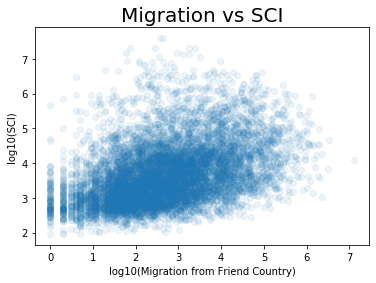

In [3]:
import math
sci_data['scaled_sci'] = pd.to_numeric(sci_data['scaled_sci'], errors='coerce')
sci_data['SCI_log10'] = np.log10(sci_data['scaled_sci'])

sci_data['Migrants_from_fr_log10'] = np.log10(sci_data['Migrants_from_fr'])
print(sci_data)
sci_data.describe()

plt.scatter(sci_data['Migrants_from_fr_log10'], sci_data['SCI_log10'], alpha = 0.08)
plt.xlabel('log10(Migration from Friend Country)')
plt.ylabel('log10(SCI)')
plt.title('Migration vs SCI', fontsize=20)
plt.show()

In [4]:
from scipy.stats import ranksums
ranksums(sci_data["scaled_sci"], sci_data["Migrants_from_fr"])

RanksumsResult(statistic=54.615138295536184, pvalue=0.0)

In [5]:
from scipy.stats import spearmanr
sp_coef = spearmanr(sci_data["scaled_sci"], sci_data["Migrants_from_fr"])
print(sp_coef)

SpearmanrResult(correlation=0.43690000264429263, pvalue=0.0)
